In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/kaggle/input/countries-by-intentional-homicide-rate/countries-by-intentional-homicide-rate.csv")

In [3]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [4]:
df.tail()

,Location,Region,Subregion,Rate,Count,Year
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015
194,Zimbabwe,Africa,Eastern Africa,7.5,981,2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [6]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [7]:
df.isnull().sum()/len(df) * 100

Location     0.0
Region       0.0
Subregion    0.0
Rate         0.0
Count        0.0
Year         0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Location'].nunique()

195

In [10]:
df['Region'].nunique()

5

In [11]:
df['Region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [12]:
df['Region'].value_counts()

Region
Asia        51
Europe      51
Americas    51
Africa      40
Oceania      2
Name: count, dtype: int64

In [13]:
df['Subregion'].nunique()

19

In [14]:
df['Subregion'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia, New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'South-Eastern Asia', 'Eastern Africa',
       'Northern Europe', 'Eastern Asia', 'Central Asia'], dtype=object)

In [15]:
df['Subregion'].value_counts()

Subregion
Caribbean                 25
Western Asia              20
Southern Europe           17
Northern Europe           15
Eastern Africa            15
South America             13
Western Africa            11
Eastern Europe            10
South-Eastern Asia        10
Southern Asia              9
Western Europe             9
Central America            8
Eastern Asia               7
Northern America           5
Southern Africa            5
Northern Africa            5
Central Asia               5
Middle Africa              4
Australia, New Zealand     2
Name: count, dtype: int64

In [16]:
df['Year'].nunique()

16

In [17]:
df['Year'].unique()

array([2018, 2020, 2012, 2014, 2019, 2017, 2010, 2006, 2013, 2016, 2011,
       2007, 2009, 2015, 2021, 2008])

In [18]:
df['Year'].value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [19]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [21]:
df[['Year','Count']].sort_values(by = 'Year' , ascending=False).head()

,Year,Count
118,2021,15299
97,2020,128
143,2020,10697
136,2020,529
83,2020,34


In [22]:
df[['Region','Year','Count']].sort_values(by = 'Year' , ascending=False).head()

,Region,Year,Count
118,Asia,2021,15299
97,Asia,2020,128
143,Europe,2020,10697
136,Americas,2020,529
83,Europe,2020,34


In [23]:
df1 = df[['Location','Count']].sort_values(by = 'Count' , ascending=False).head()
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


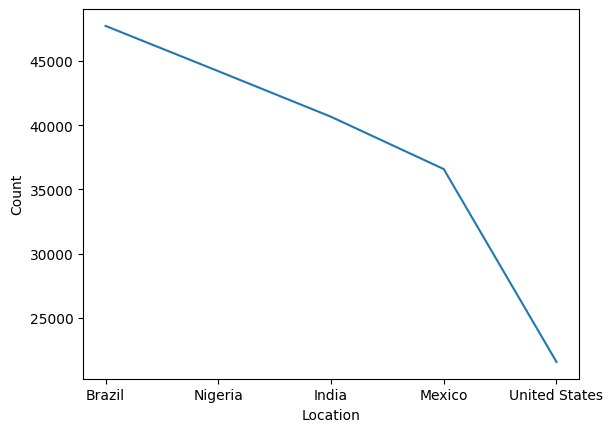

In [24]:
sns.lineplot(data = df1 , x = 'Location' , y = 'Count', palette='viridis' )
plt.show()

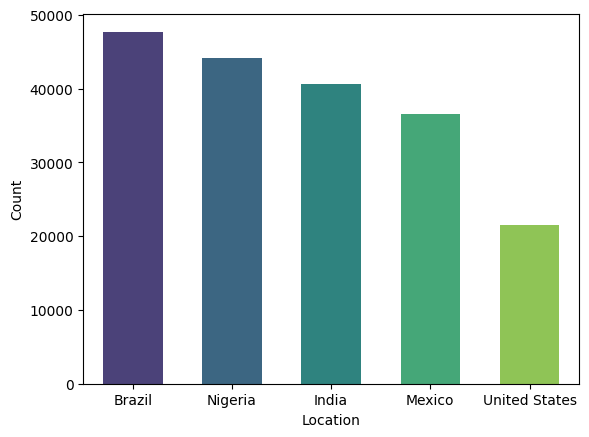

In [25]:
sns.barplot(data=df1, x='Location', y='Count', palette='viridis', width=0.6)
plt.show()

In [26]:
df2 = df.groupby('Region')['Count'].sum().reset_index().sort_values(by = 'Count'  , ascending= False)
df2

,Region,Count
1,Americas,153597
2,Asia,105552
0,Africa,99481
3,Europe,19869
4,Oceania,347


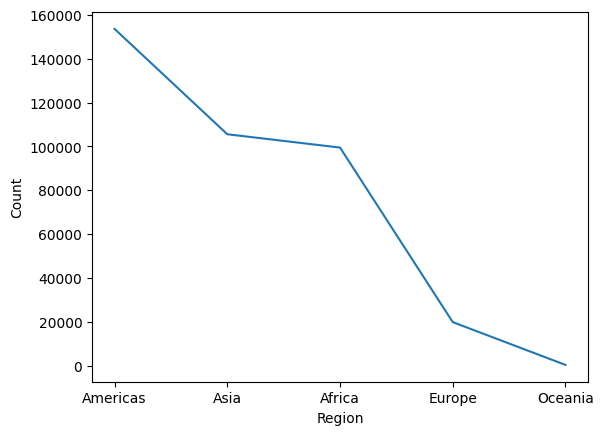

In [27]:
sns.lineplot(data = df2 , x = 'Region' , y = 'Count')
plt.show()

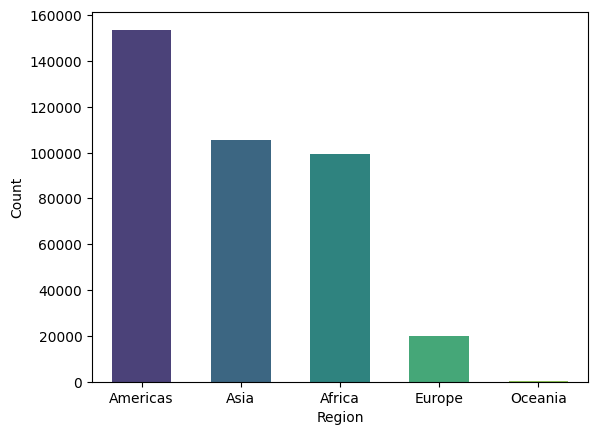

In [28]:
sns.barplot(data=df2, x='Region', y='Count', palette='viridis', width=0.6)
plt.show()

In [29]:
df3 = df.groupby('Subregion')['Count'].sum().reset_index().sort_values(by = 'Count' ,ascending=False)
df3

,Subregion,Count
11,South America,78872
14,Southern Asia,58631
2,Central America,47371
16,Western Africa,46318
12,South-Eastern Asia,25314
4,Eastern Africa,23669
9,Northern America,22317
13,Southern Africa,21479
6,Eastern Europe,14604
17,Western Asia,11638


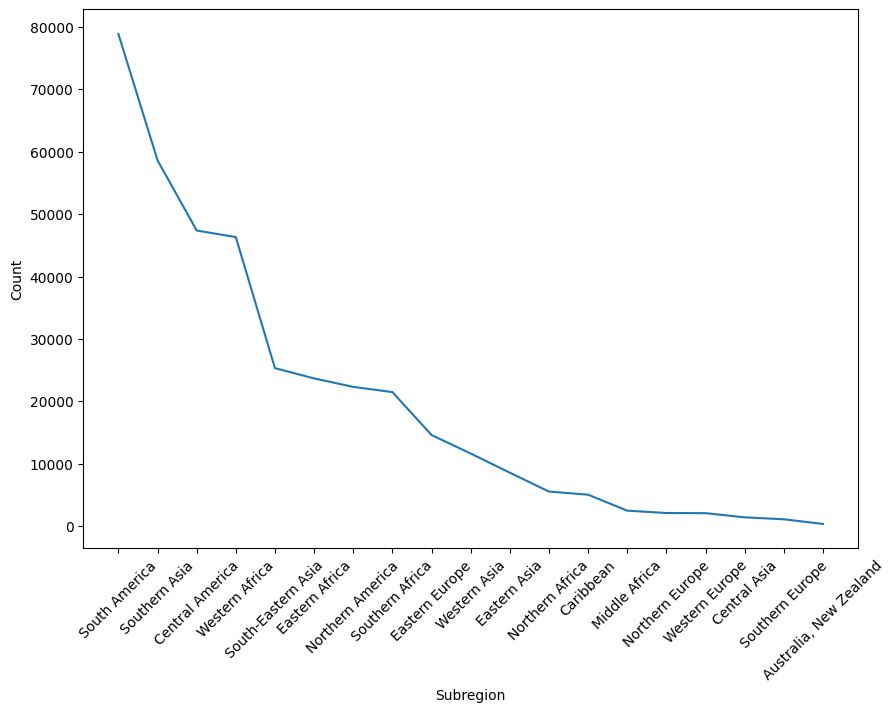

In [30]:
plt.figure(figsize = (10 ,7))
sns.lineplot(data = df3 , x = 'Subregion' , y = 'Count')
plt.xticks(rotation = 45)
plt.show()

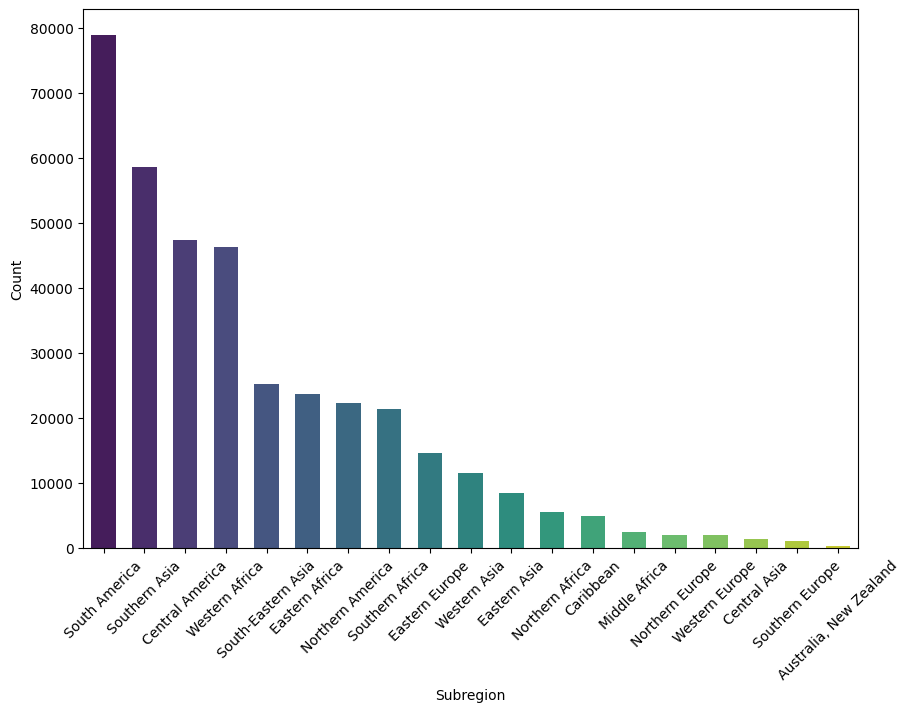

In [31]:
plt.figure(figsize = (10 ,7))
sns.barplot(data = df3 , x = 'Subregion' , y = 'Count', palette='viridis', width=0.6)
plt.xticks(rotation = 45)
plt.show()

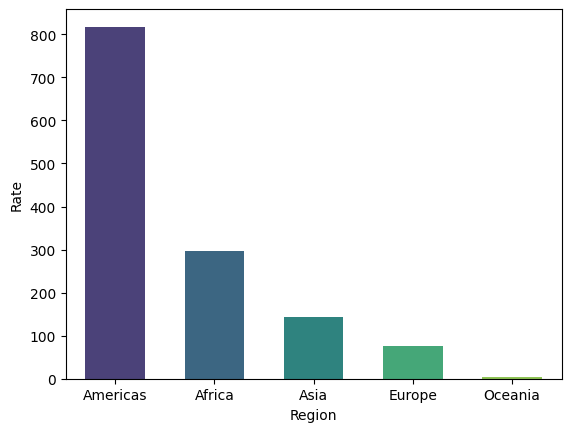

In [32]:
gruop_df = df.groupby('Region')['Rate'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data = gruop_df , x = 'Region' , y = 'Rate' ,palette='viridis', width=0.6 )
plt.show()

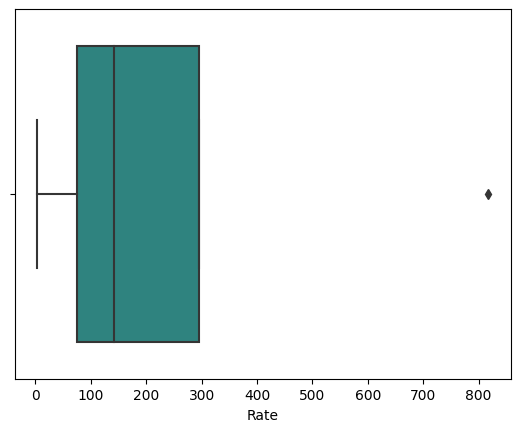

In [33]:
sns.boxplot(data = gruop_df , x = 'Rate' ,palette='viridis')
plt.show()

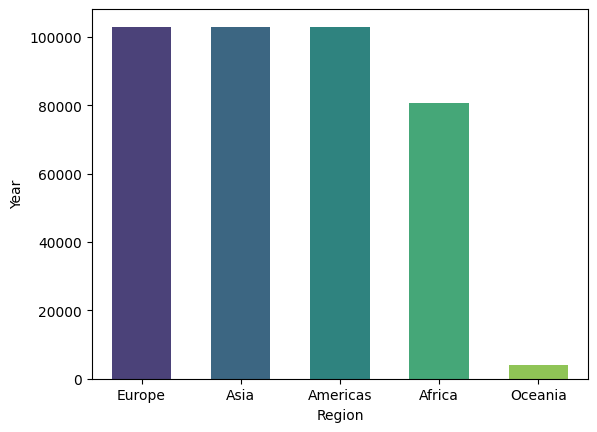

In [34]:
gruop_df1 = df.groupby('Region')['Year'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data = gruop_df1 , x = 'Region' , y = 'Year' ,palette='viridis', width=0.6 )
plt.show()


In [35]:
group_data = df.groupby('Year')['Rate'].sum().sort_values(ascending=False).reset_index()
group_data

,Year,Rate
0,2020,608.0
1,2019,161.0
2,2012,119.5
3,2016,78.8
4,2018,70.0
5,2015,58.5
6,2014,54.2
7,2009,39.5
8,2017,30.3
9,2021,28.4


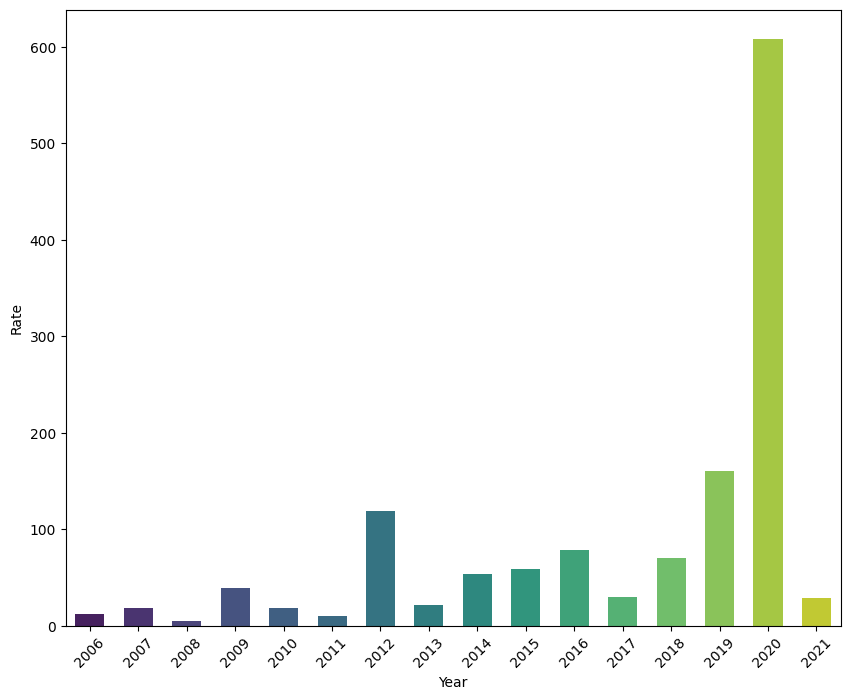

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(data = group_data , x = 'Year' , y = 'Rate' ,palette='viridis', width=0.6)
plt.xticks(rotation = 45)
plt.show()